<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'climate-change-earth-surface-temperature-data' dataset.
Path to dataset files: /kaggle/input/climate-change-earth-surface-temperature-data


In [65]:
!ls /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2/GlobalTemperatures.csv
path = "/root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2/GlobalTemperatures.csv"

/root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2/GlobalTemperatures.csv


In [66]:
import pandas as pd
import numpy as np

In [67]:
data_df = pd.read_csv(path)
data_df['dt'] = pd.to_datetime(data_df['dt'])
data_df = data_df.set_index('dt')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 224.4 KB


In [68]:
# find missing values in the dataset
data_df.isnull().sum()

,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12
LandMaxTemperature,1200
LandMaxTemperatureUncertainty,1200
LandMinTemperature,1200
LandMinTemperatureUncertainty,1200
LandAndOceanAverageTemperature,1200
LandAndOceanAverageTemperatureUncertainty,1200


In [69]:
#print missing values rows of LandAndOceanAverageTemperature
data_df[data_df['LandAverageTemperature'].isnull()].head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='dt'>

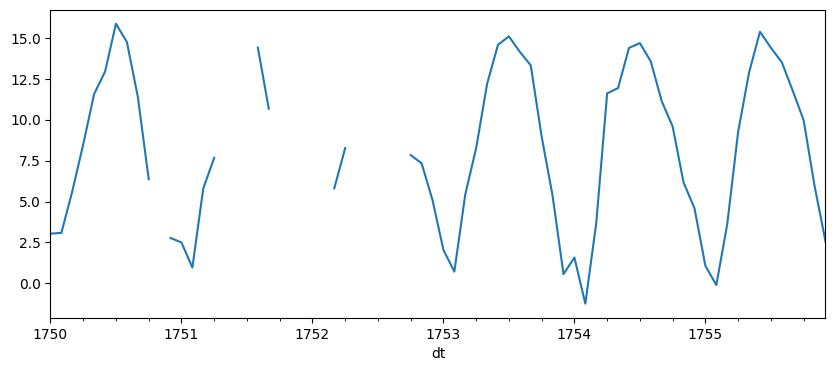

In [83]:
data_df.loc['1750':'1755']['LandAverageTemperature'].plot(figsize=(10,4))

/tmp/ipython-input-166100939.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df_ffill = data_df.fillna(method='bfill')


<Axes: xlabel='dt'>

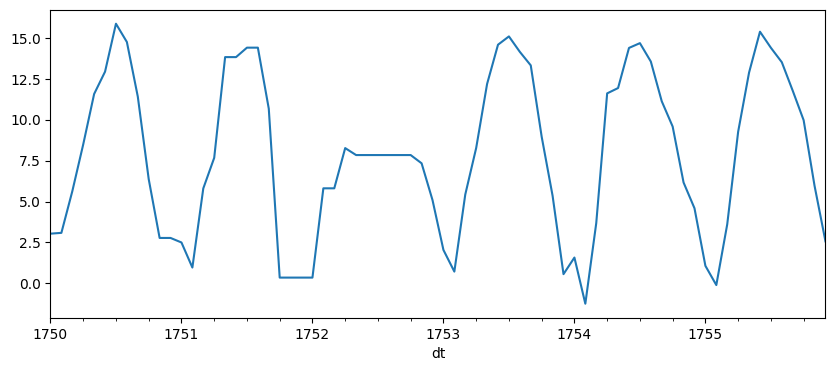

In [93]:
# fill missing values from the previous value
data_df_ffill = data_df.fillna(method='bfill')
data_df_ffill.loc['1750':'1755']['LandAverageTemperature'].plot(figsize=(10,4))

/tmp/ipython-input-156294485.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df_ffill = data_df.fillna(method='ffill')


<Axes: xlabel='dt'>

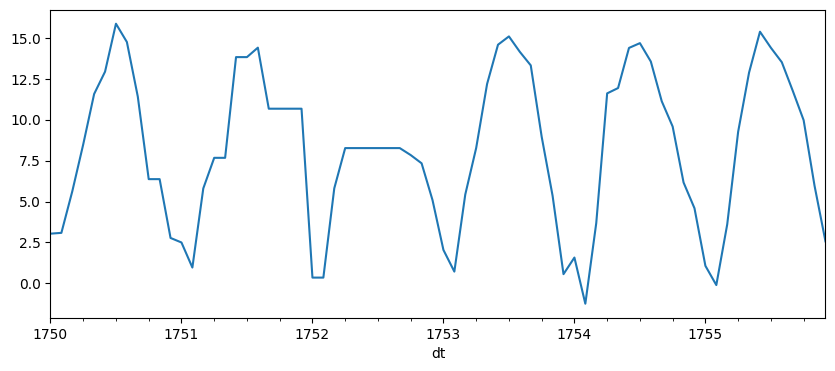

In [94]:
# fill missing values from the forward value
data_df_ffill = data_df.fillna(method='ffill')
data_df_ffill.loc['1750':'1755']['LandAverageTemperature'].plot(figsize=(10,4))

<Axes: xlabel='dt'>

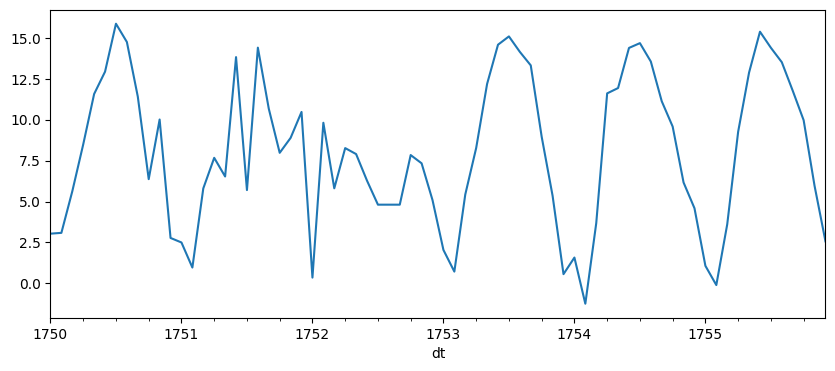

In [95]:
# fill missing values with average of lst 10 values
data_df_rolling = data_df.fillna(data_df.rolling(window=10,  min_periods=1).mean())
data_df_rolling.loc['1750':'1755']['LandAverageTemperature'].plot(figsize=(10,4))

<Axes: xlabel='dt'>

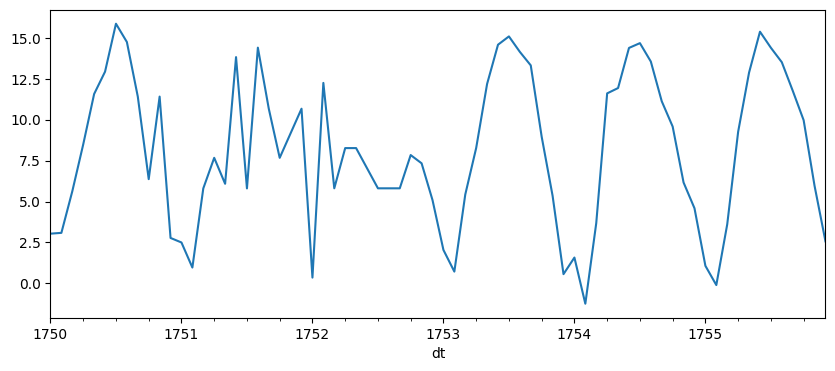

In [96]:
# fill missing values with median of lst 10 values
data_df_rolling = data_df.fillna(data_df.rolling(window=10,  min_periods=1).median())
data_df_rolling.loc['1750':'1755']['LandAverageTemperature'].plot(figsize=(10,4))

<Axes: xlabel='dt'>

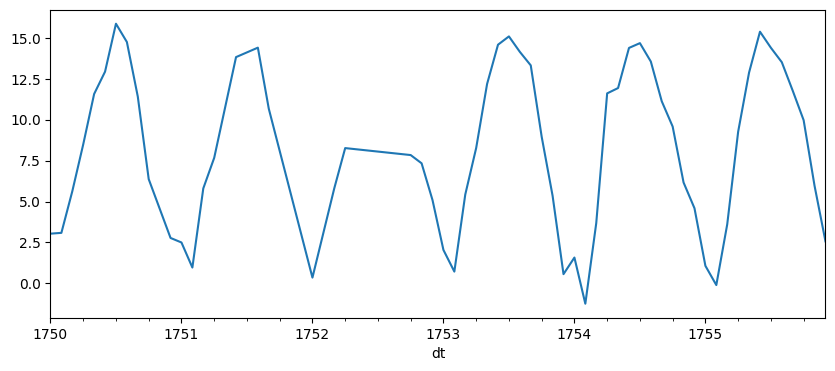

In [114]:
# fill from the interpolation method
data_df_interpolate = data_df.interpolate(method="linear")
data_df_interpolate.loc['1750':'1755']['LandAverageTemperature'].plot(figsize=(10,4))

<Axes: xlabel='dt'>

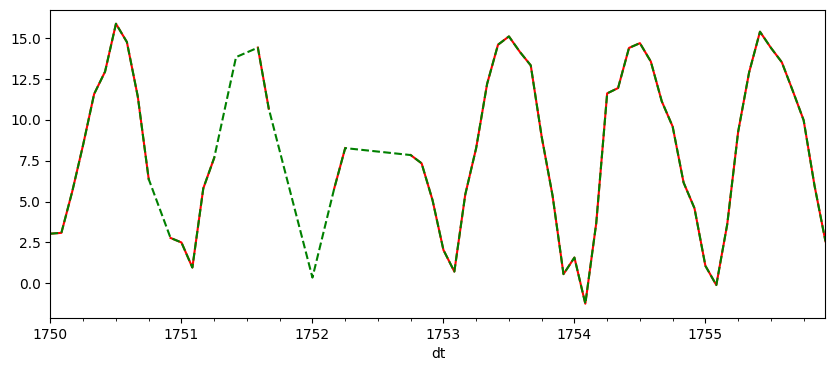

In [115]:
original = data_df.loc['1750':'1755']['LandAverageTemperature']
linear_interpolated = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

#plot original and interpolated in the same plot as dashdot
original.plot(label='Original', color='red',figsize=(10,4))
linear_interpolated.plot(label='Interpolated', color='green', linestyle='--')

<Axes: xlabel='dt'>

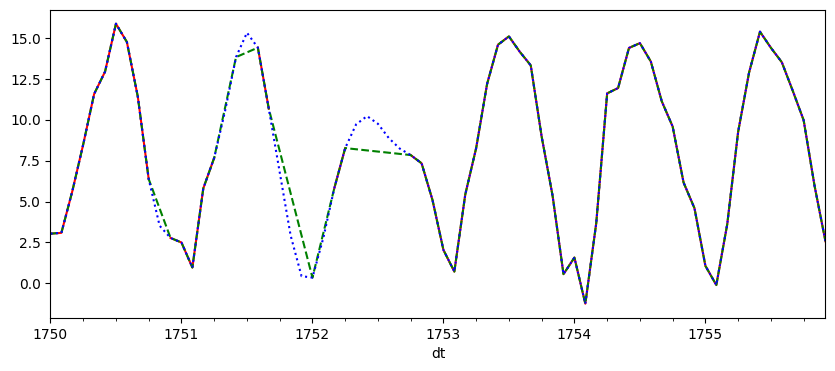

In [121]:
# quadratic interpolation
data_df_interpolate = data_df.interpolate(method='quadratic')
quadratic_interpolated = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

#plot original and interpolated in the same plot as dashdot
original.plot(label='Original', color='red',figsize=(10,4))
linear_interpolated.plot(label='Interpolated', color='green', linestyle='--')
quadratic_interpolated.plot(label='Interpolated', color='blue', linestyle='dotted')


<Axes: xlabel='dt'>

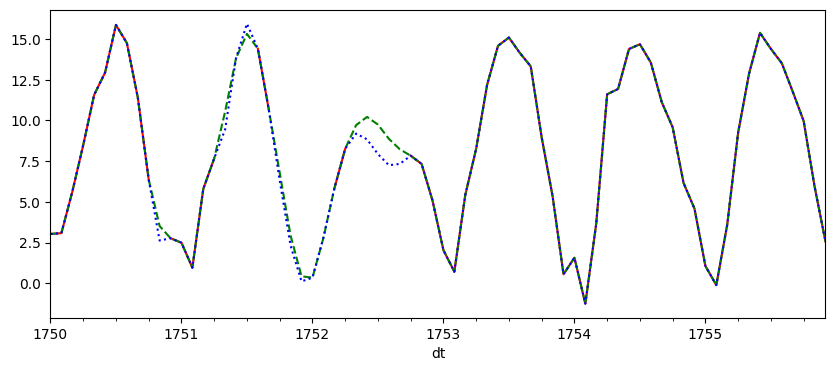

In [125]:
# quadratic interpolation
data_df_interpolate = data_df.interpolate(method='polynomial', order=5)
polynomial_interpolated = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

#plot original and interpolated in the same plot as dashdot
original.plot(label='Original', color='red',figsize=(10,4))
quadratic_interpolated.plot(label='Interpolated', color='green', linestyle='--')
polynomial_interpolated.plot(label='Interpolated', color='blue', linestyle='dotted')


<Axes: xlabel='dt'>

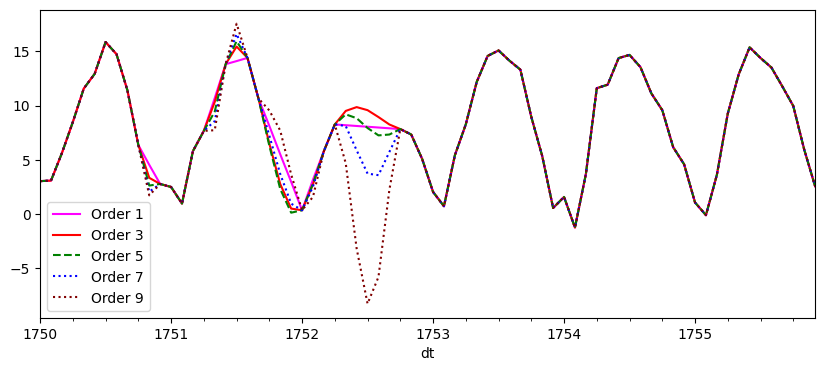

In [140]:
# polynomial interpolation

data_df_interpolate = data_df.interpolate(method='polynomial', order=1)
polynomial_interpolated_1 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='polynomial', order=3)
polynomial_interpolated_3 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='polynomial', order=5)
polynomial_interpolated_5 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='polynomial', order=7)
polynomial_interpolated_7 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='polynomial', order=9)
polynomial_interpolated_9 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

#plot original and interpolated in the same plot as dashdot
polynomial_interpolated_1.plot(label='Order 1', color='magenta',figsize=(10,4), legend=True)
polynomial_interpolated_3.plot(label='Order 3', color='red',figsize=(10,4), legend=True)
polynomial_interpolated_5.plot(label='Order 5', color='green', linestyle='--', legend=True)
polynomial_interpolated_7.plot(label='Order 7', color='blue', linestyle='dotted', legend=True)
polynomial_interpolated_9.plot(label='Order 9', color='maroon', linestyle='dotted', legend=True)

<Axes: xlabel='dt'>

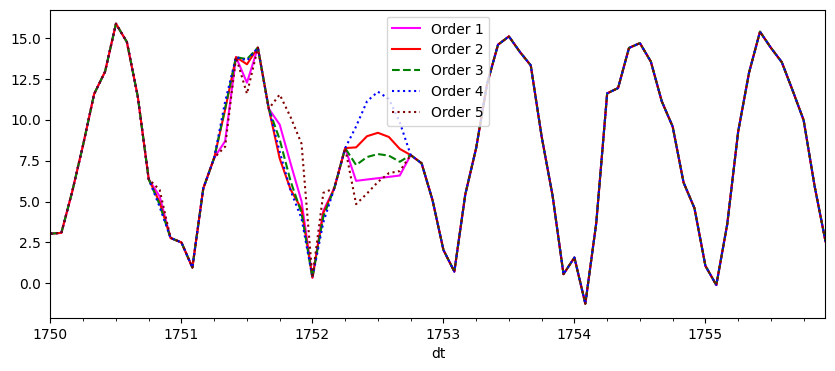

In [143]:
# spline interpolation

data_df_interpolate = data_df.interpolate(method='spline', order=1)
spline_interpolated_1 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='spline', order=2)
spline_interpolated_2 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='spline', order=3)
spline_interpolated_3 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='spline', order=4)
spline_interpolated_4 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

data_df_interpolate = data_df.interpolate(method='spline', order=5)
spline_interpolated_5 = data_df_interpolate.loc['1750':'1755']['LandAverageTemperature']

#plot original and interpolated in the same plot as dashdot
spline_interpolated_1.plot(label='Order 1', color='magenta',figsize=(10,4), legend=True)
spline_interpolated_2.plot(label='Order 2', color='red',figsize=(10,4), legend=True)
spline_interpolated_3.plot(label='Order 3', color='green', linestyle='--', legend=True)
spline_interpolated_4.plot(label='Order 4', color='blue', linestyle='dotted', legend=True)
spline_interpolated_5.plot(label='Order 5', color='maroon', linestyle='dotted', legend=True)

In [ ]:
# outlier detection for the series using standard deviation

